<a href="https://colab.research.google.com/github/justinjiholee/covid-vaccinations/blob/main/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 5- COVID 19 Vaccination availability by country 

In [ ]:
# download libraries to then use in google colab

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
 
# Install rtree - Geopandas requirment
!apt install python3-rtree

# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git

# Install descartes - Geopandas requirment
!pip install descartes 

# Install Folium for Geographic data visualization
!pip install folium

# Install mapclassify for geospatial data viz
!pip install mapclassify

In [ ]:
# for data analysis
import pandas as pd
import numpy as np

# for data viz
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# to download files
from google.colab import files

# for geo analysis
import geopandas as gpd
import mapclassify


First we will visualize top 5 countries with the highest number of Hopkins students according to https://www.collegefactual.com/colleges/johns-hopkins-university/student-life/international/chart-international.html:

In [ ]:
#import data

df_internationaljhu = pd.read_csv("https://raw.githubusercontent.com/DurdonaG/covidvaccination_for_jhustudents/main/Data/JHU%20number%20of%20students.csv")

In [ ]:
# preview
df_internationaljhu.head()

,Country,Popularity Ranking,Quality Ranking,Value Ranking,Student number
0,Australia,19,15.0,198.0,37
1,Bahamas,106,NaN,NaN,0
2,Bangladesh,229,68.0,259.0,1
3,Brazil,106,37.0,447.0,23
4,Canada,20,18.0,627.0,219


In [ ]:
# check data types
df_internationaljhu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             48 non-null     object 
 1   Popularity Ranking  48 non-null     int64  
 2   Quality Ranking     35 non-null     float64
 3   Value Ranking       35 non-null     float64
 4   Student number      48 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.0+ KB


In [ ]:
# import geospatial data
gdf_countries = gpd.read_file("99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp")

In [ ]:
gdf_countries.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


In [ ]:
# look at info
gdf_countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    251 non-null    int64   
 1   CNTRY_NAME  251 non-null    object  
 2   geometry    251 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 6.0+ KB


In [ ]:
# creating a new gdf of polygon and election data
# merge state data onto the elction data on the column contining the fips code
gdf_students = gdf_countries.merge(df_internationaljhu,
                                how = "right",
                                left_on = "CNTRY_NAME",
                                right_on = "Country")

In [ ]:
gdf_students.head()

,OBJECTID,CNTRY_NAME,geometry,Country,Popularity Ranking,Quality Ranking,Value Ranking,Student number
0,12.0,Australia,"MULTIPOLYGON (((142.27997 -10.26556, 142.21053...",Australia,19,15.0,198.0,37
1,NaN,NaN,None,Bahamas,106,NaN,NaN,0
2,22.0,Bangladesh,"MULTIPOLYGON (((92.26860 23.71944, 92.27805 23...",Bangladesh,229,68.0,259.0,1
3,30.0,Brazil,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ...",Brazil,106,37.0,447.0,23
4,36.0,Canada,"MULTIPOLYGON (((-84.47945 77.29443, -84.46764 ...",Canada,20,18.0,627.0,219


Text(0.5, 1.0, 'Popularity ranking of JHU by country')

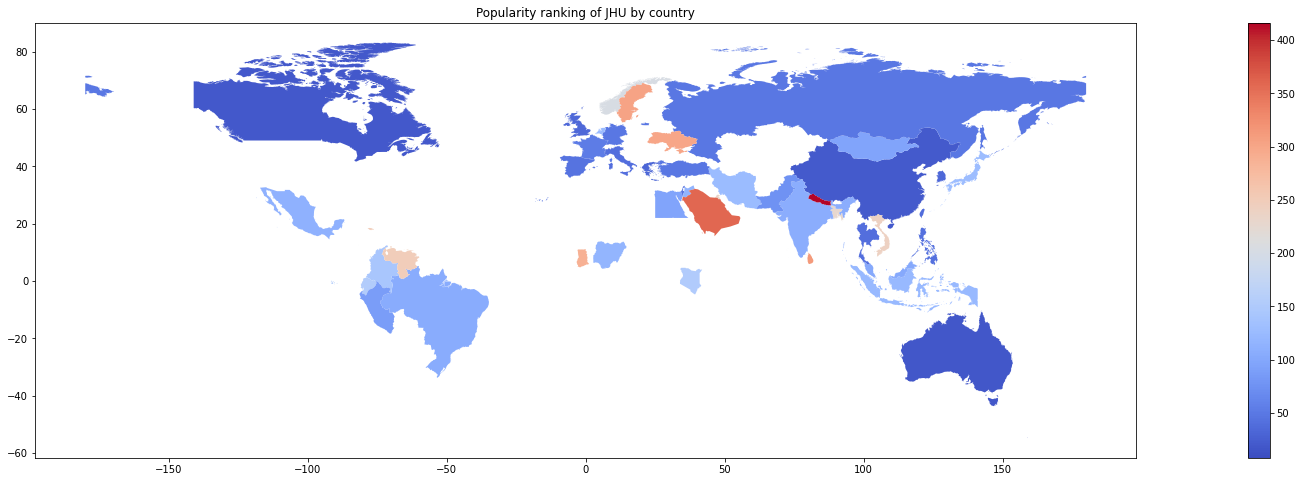

In [ ]:
# choropleth maps

# define the figure and the legend
fig, ax = plt.subplots(figsize= (40,8))

# plot with gdf
gdf_students.plot(column = "Popularity Ranking",
                       ax = ax,
                       legend = True,
                       cmap = "coolwarm")

                       #scheme = "User_Defined",
                       #classification_kwds = dict(bins = [10, 20, 30, 40, 50, 60, 70,80,90,100]))

# add a title
plt.title("Popularity ranking of JHU by country")


Text(0.5, 1.0, 'Value ranking of JHU by country')

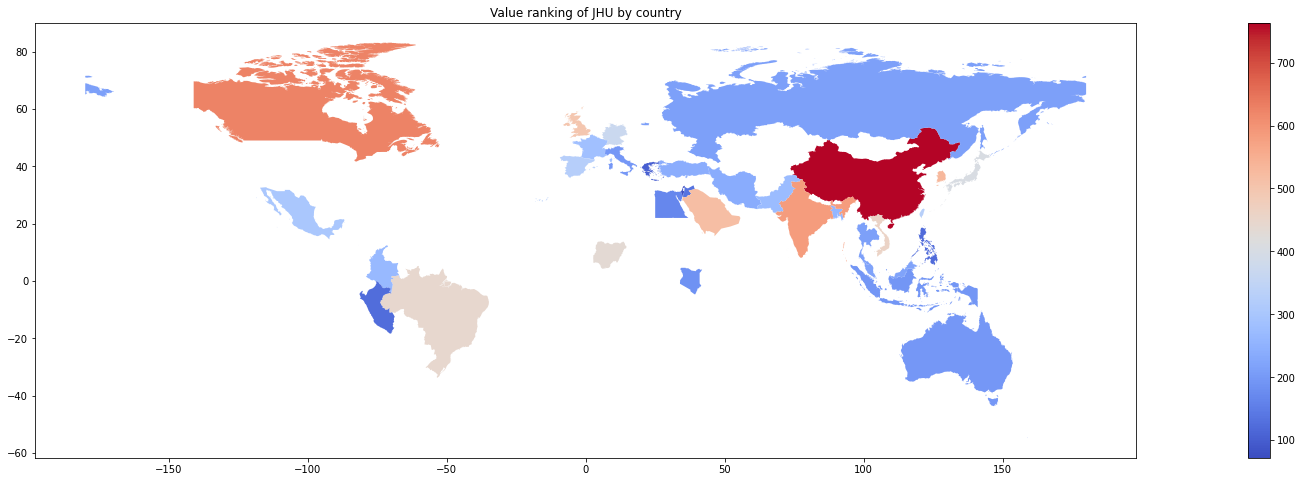

In [ ]:
# define the figure and the legend
fig, ax = plt.subplots(figsize= (40, 8))

# plot with gdf
gdf_students.plot(column = "Value Ranking",
                       ax = ax,
                       legend = True,
                       cmap = "coolwarm")

                       #scheme = "User_Defined",
                       #classification_kwds = dict(bins = [10, 20, 30, 40, 50, 60, 70,80,90,100]))

# add a title
plt.title("Value ranking of JHU by country")


Text(0.5, 1.0, 'Number of JHU students by country')

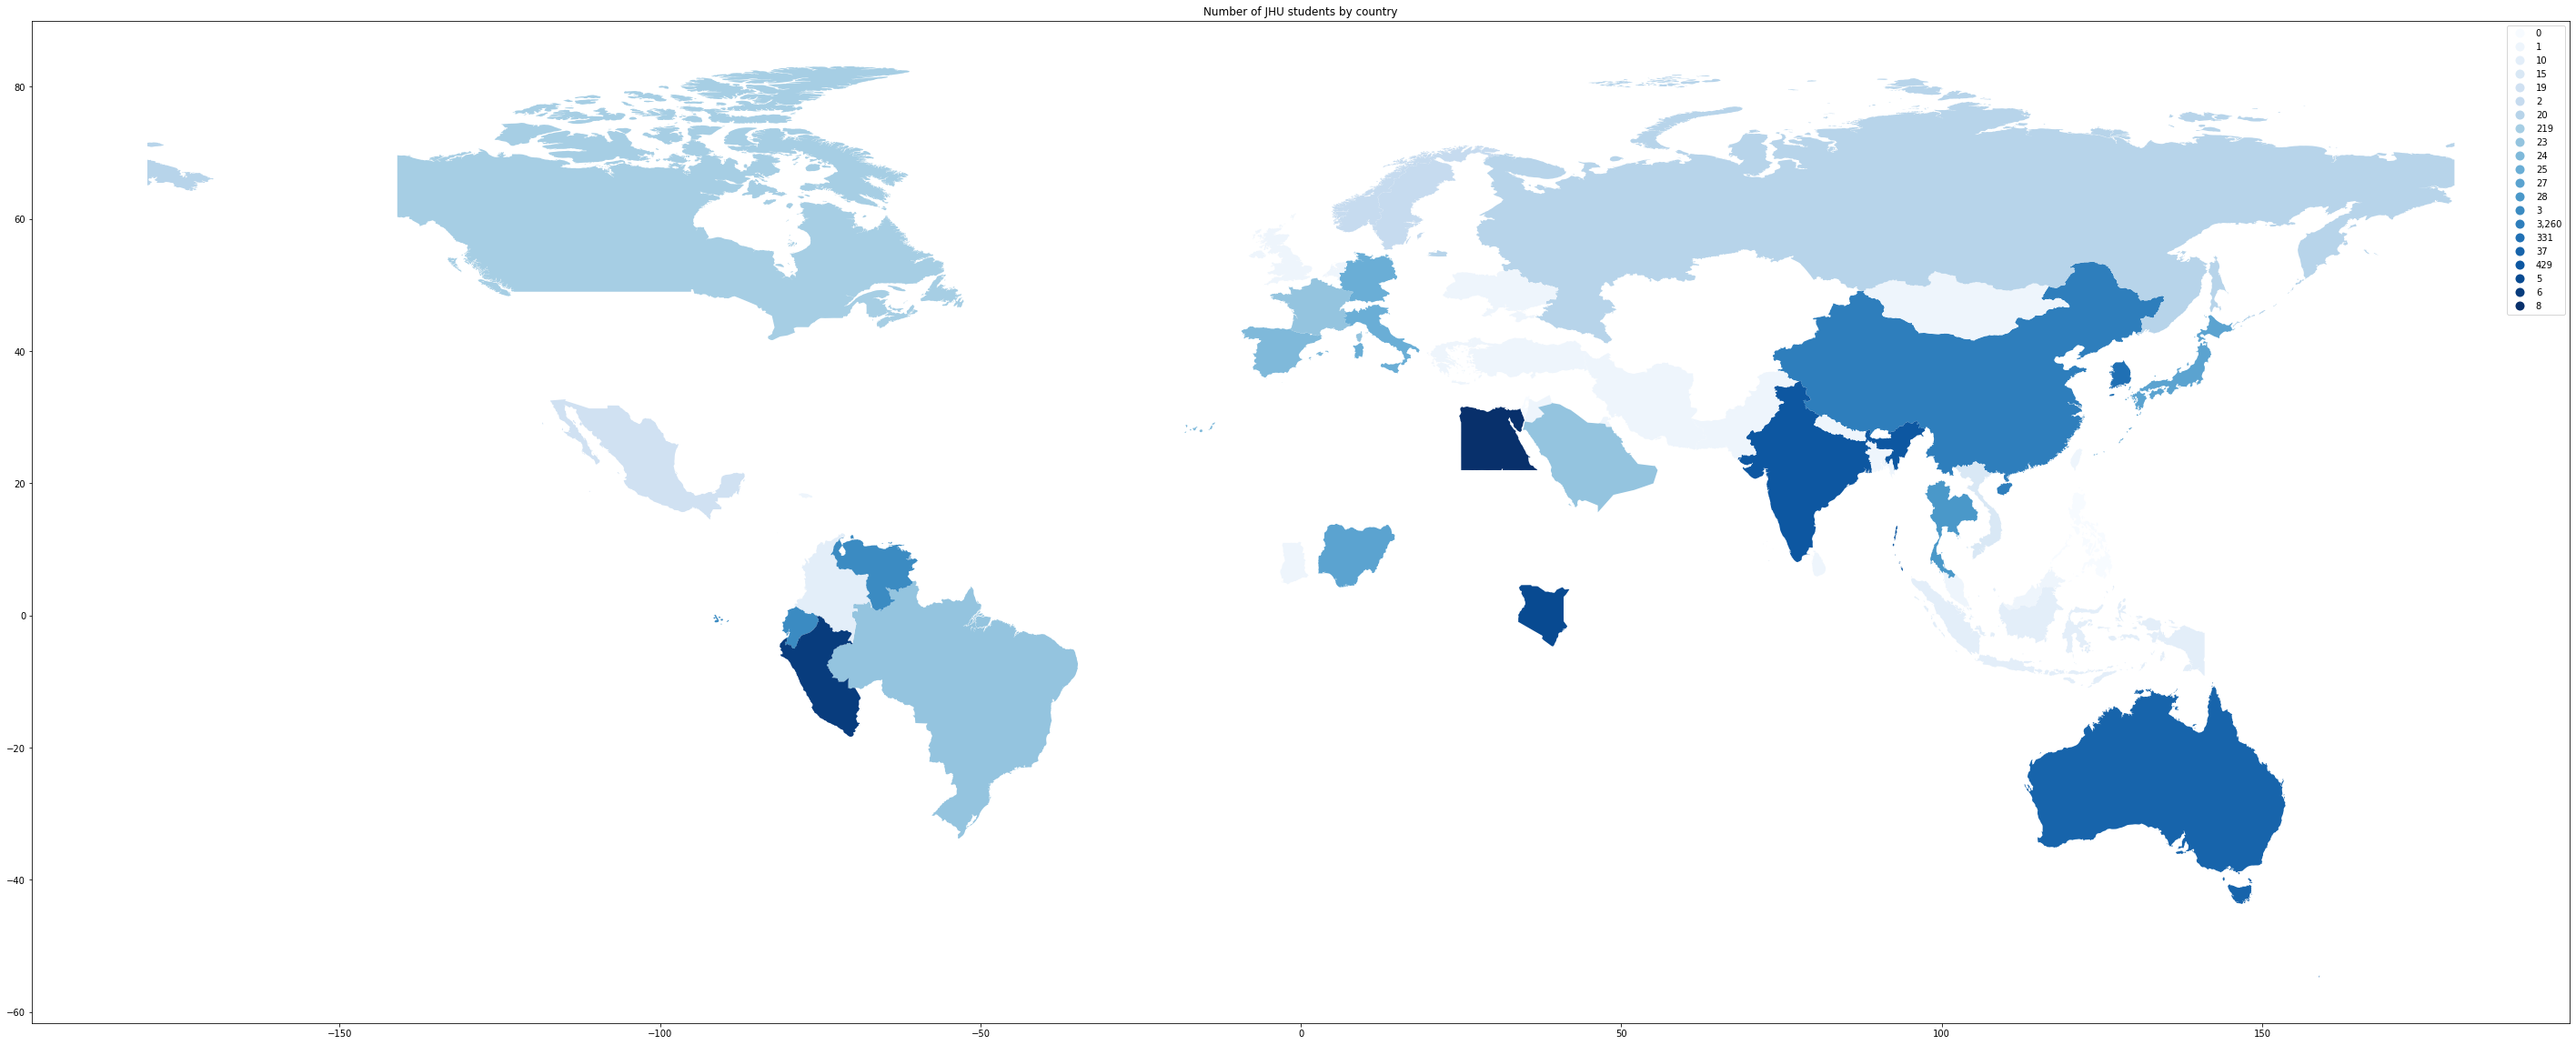

In [ ]:
# define the figure and the legend
fig, ax = plt.subplots(figsize= (50, 25))

# plot with gdf
gdf_students.plot(column = "Student number",
                       ax = ax,
                       legend = True,
                       cmap = "Blues")
                       #scheme = "User_Defined",
                       #classification_kwds = dict(bins = [10, 20, 30, 40, 50, 60, 70,80,90,100]))

# add a title
plt.title("Number of JHU students by country")


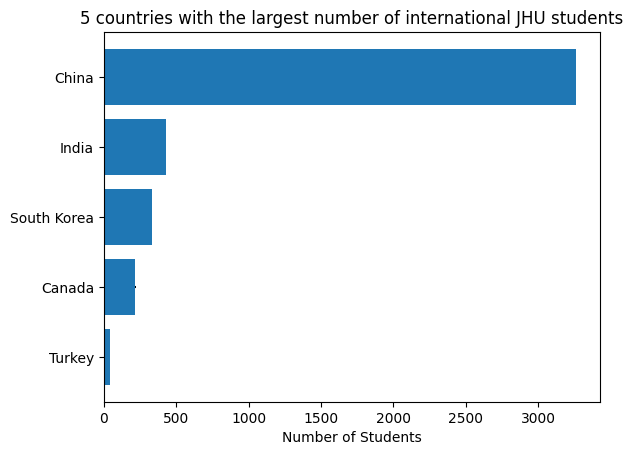

In [ ]:
#Top 5 countries with most JHU students 
plt.rcdefaults()
fig, ax = plt.subplots()


countries = ('China', 'India', 'South Korea', 'Canada', 'Turkey')
y_pos = np.arange(len(countries))
students = (3260, 429, 331, 219, 41)
error = np.random.rand(len(countries))

ax.barh(y_pos, students, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Students')
ax.set_title('5 countries with the largest number of international JHU students')


plt.show()
 

# Vaccination analysis


In [ ]:
# import csv for covid-19 data

df_cov = pd.read_csv("https://raw.githubusercontent.com/DurdonaG/covidvaccination_for_jhustudents/main/Data/Covid%20Data.csv")

In [ ]:
# preview data

df_cov.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
84754,ZWE,Africa,Zimbabwe,4/24/21,38064.0,19.0,52.143,1556.0,0.0,0.571,2561.003,1.278,3.508,104.690,0.000,0.038,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1583.0,481672.0,32.408,0.107,1751.0,0.118,0.03,33.6,tests performed,372099.0,324488.0,47611.0,6114.0,8600.0,2.50,2.18,0.32,579.0,51.85,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
84755,ZWE,Africa,Zimbabwe,4/25/21,38086.0,22.0,47.857,1557.0,1.0,0.571,2562.483,1.480,3.220,104.757,0.067,0.038,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390018.0,336600.0,53418.0,17919.0,10796.0,2.62,2.26,0.36,726.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
84756,ZWE,Africa,Zimbabwe,4/26/21,38102.0,16.0,34.714,1560.0,3.0,1.000,2563.560,1.077,2.336,104.959,0.202,0.067,1.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411610.0,353834.0,57776.0,21592.0,13517.0,2.77,2.38,0.39,909.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
84757,ZWE,Africa,Zimbabwe,4/27/21,38164.0,62.0,41.286,1565.0,5.0,1.571,2567.731,4.171,2.778,105.296,0.336,0.106,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433939.0,370676.0,63263.0,22329.0,15562.0,2.92,2.49,0.43,1047.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
84758,ZWE,Africa,Zimbabwe,4/28/21,38191.0,27.0,30.143,1565.0,0.0,1.429,2569.548,1.817,2.028,105.296,0.000,0.096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,458013.0,388021.0,69992.0,24074.0,17860.0,3.08,2.61,0.47,1202.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [ ]:
df_cov_day = df_cov[df_cov["date"].str.contains("4/28/21")]


In [ ]:
df_cov_day.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
429,AFG,Asia,Afghanistan,4/28/21,59370.0,145.0,165.143,2611.0,13.0,7.714,1525.110,3.725,4.242,67.072,0.334,0.198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
870,OWID_AFR,NaN,Africa,4/28/21,4532581.0,9524.0,10030.000,121133.0,340.0,316.286,3381.014,7.104,7.482,90.357,0.254,0.236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17593073.0,12566761.0,4819465.0,388919.0,151841.0,1.31,0.94,0.36,113.0,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,ALB,Europe,Albania,4/28/21,130859.0,123.0,125.571,2386.0,3.0,4.000,45471.888,42.741,43.635,829.106,1.042,1.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433628.0,NaN,NaN,16773.0,8793.0,15.07,NaN,NaN,3055.0,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
1728,DZA,Africa,Algeria,4/28/21,121580.0,236.0,200.857,3234.0,9.0,8.857,2772.568,5.382,4.580,73.750,0.205,0.202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
2151,AND,Europe,Andorra,4/28/21,13148.0,27.0,33.000,125.0,1.0,0.286,170167.605,349.447,427.102,1617.809,12.942,3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868


In [ ]:
gdf_students = gdf_countries.merge(df_cov_day,
                                how = "right",
                                left_on = "CNTRY_NAME",
                                right_on = "location")

In [ ]:

import mapclassify


Text(0.5, 1.0, 'People Vaccinated Per Hundred')

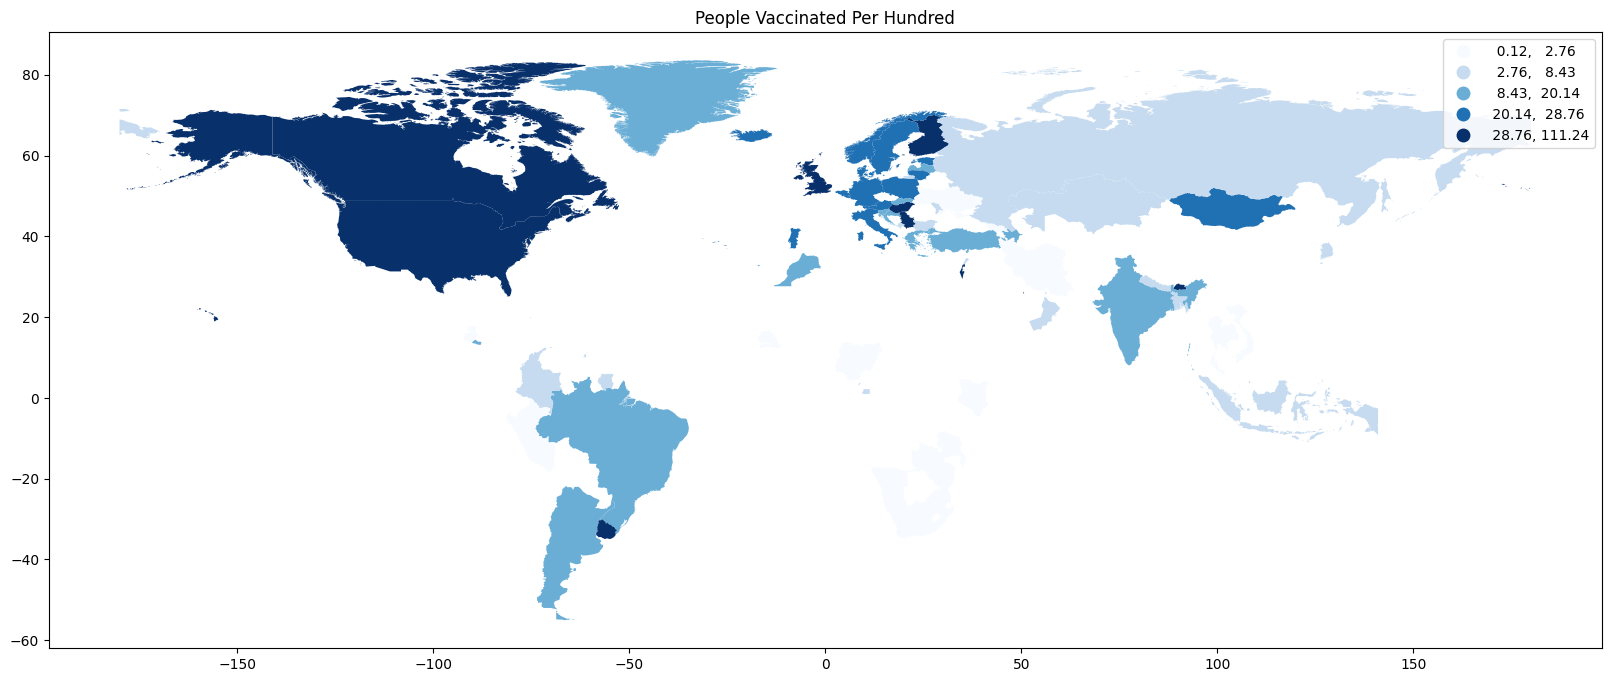

In [ ]:
# define the figure and the legend
fig, ax = plt.subplots(figsize= (35, 8))

# plot with gdf
gdf_students.plot(column = "people_vaccinated_per_hundred",
                       ax = ax,
                       legend = True,
                       cmap = "Blues",
                       scheme ='quantiles')

# add a title
plt.title("People Vaccinated Per Hundred")

In [ ]:
# data for select countries

df_cov_china = df_cov[df_cov["location"].str.contains("China")]
df_cov_india = df_cov[df_cov["location"].str.contains("India")]
df_cov_korea = df_cov[df_cov["location"].str.contains("Korea")]
df_cov_canada = df_cov[df_cov["location"].str.contains("Canada")]
df_cov_turkey = df_cov[df_cov["location"].str.contains("Turkey")]

In [ ]:
df_cov_china = df_cov_china[df_cov["date"].str.contains("4/28/21")]
df_cov_india = df_cov_india[df_cov["date"].str.contains("4/28/21")]
df_cov_korea = df_cov_korea[df_cov["date"].str.contains("4/28/21")]
df_cov_canada = df_cov_canada[df_cov["date"].str.contains("4/28/21")]
df_cov_turkey = df_cov_turkey[df_cov["date"].str.contains("4/28/21")]

In [ ]:
df_covid_merge =  pd.concat([df_cov_china, df_cov_india, df_cov_korea, df_cov_canada, df_cov_turkey], axis = 0, sort = False)

In [ ]:
# preview merged data
df_covid_merge.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
16514,CHN,Asia,China,4/28/21,102446.0,27.0,20.857,4845.0,0.0,0.000,71.176,0.019,0.014,3.366,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243905000.0,NaN,NaN,7929000.0,5673429.0,16.95,NaN,NaN,3942.0,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761
35302,IND,Asia,India,4/28/21,18376421.0,379308.0,349378.143,204832.0,3645.0,2882.143,13316.205,274.860,253.172,148.429,2.641,2.089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147053392.0,122538179.0,24515213.0,2174159.0,2486755.0,10.66,8.88,1.78,1802.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645
71309,KOR,Asia,South Korea,4/28/21,121351.0,678.0,670.000,1825.0,4.0,2.429,2366.938,13.224,13.068,35.596,0.078,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2977515.0,2808794.0,168721.0,242464.0,144732.0,5.81,5.48,0.33,2823.0,NaN,5.126918e+07,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.80,6.2,40.9,NaN,12.27,83.03,0.916
14277,CAN,North America,Canada,4/28/21,1210918.0,8246.0,7980.714,24110.0,62.0,49.857,32083.964,218.482,211.454,638.808,1.643,1.321,NaN,1431.0,37.915,4416.0,117.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12826266.0,11764830.0,1061436.0,261941.0,289731.0,33.98,31.17,2.81,7677.0,NaN,3.774216e+07,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.50,82.43,0.929
78524,TUR,Asia,Turkey,4/28/21,4751026.0,40444.0,43490.714,39398.0,341.0,346.143,56332.447,479.541,515.665,467.138,4.043,4.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22132803.0,13512810.0,8619993.0,454342.0,236445.0,26.24,16.02,10.22,2804.0,NaN,8.433907e+07,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820
